# Predicting Housing Prices in Ames, Iowa
### Exploring the Data: Overview of dataset and the target variable, SalesPrice

In [1]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

In [2]:
# Load in the data
train_df = pd.read_csv("./house-prices-data/train.csv")
# Check number of rows and columns
train_df.shape

(1460, 81)

In [3]:
# Check the first 20 rows 
peek = train_df.head(5)
peek

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Review the columns
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
# ID column is unecessary. Let's check if there are any duplicates ids
idsUnique = len(set(train_df.Id))
idsTotal = train_df.shape[0]
idsDup = idsTotal - idsUnique

print("There are "+ str(idsDup) + " duplicate IDs for " + str(idsTotal) + " total records")

There are 0 duplicate IDs for 1460 total records


In [7]:
# We drop the ID column since it will not add any value to the modelling exercise
train_df.drop("Id", axis= 1, inplace=True)

In [8]:
# Check datatypes for columns
train_df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

In [9]:
# Count the frequency of variable types in the dataframe
train_df.dtypes.value_counts()

object     43
int64      34
float64     3
dtype: int64

In [10]:
# check descriptive statistics for target variable "SalePrice"
from pandas import set_option
set_option('display.width', 100)
set_option('precision', 1)

target_description = train_df["SalePrice"].describe()
target_description

count     1460.000
mean    180921.196
std      79442.503
min      34900.000
25%     129975.000
50%     163000.000
75%     214000.000
max     755000.000
Name: SalePrice, dtype: float64

/Users/jeremyosir/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


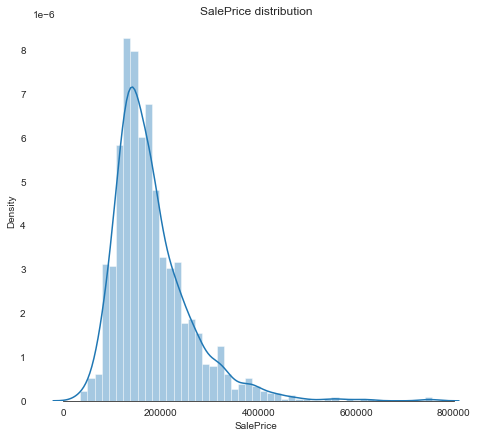

Skewness: 1.882876
Kurtosis: 6.536282


In [11]:
# histogram Saleprice

sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
sns.distplot(train_df["SalePrice"]);
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)
plt.show()

# Check for skewness and kurtosis measures
print("Skewness: %f" %train_df['SalePrice'].skew())
print("Kurtosis: %f" %train_df['SalePrice'].kurt())

# The histogram plot shows that SalePrice is not normally distributed
    # Positive Skewness Score, 1.88, indicates distribution is skewed right
    # Kurtosis score > 3 indicates a higher likelihood of outliers

### **NOTE** SalePrice distribution is skewed right. We will log transform the variable to make it have a more normal distribution. Linear models perform best when provided with normally distributed data.

In [12]:
# Log-transform sale price
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])
train_df['SalePrice'].describe()

count   1460.000
mean      12.024
std        0.399
min       10.460
25%       11.775
50%       12.002
75%       12.274
max       13.534
Name: SalePrice, dtype: float64

/Users/jeremyosir/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


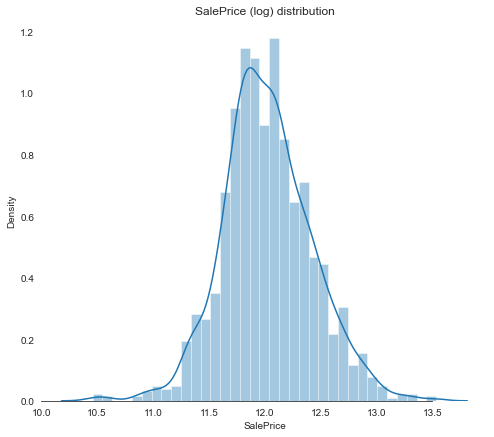

In [13]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
sns.distplot(train_df["SalePrice"]);
ax.set(title="SalePrice (log) distribution")
sns.despine(trim=True, left=True)
plt.show()

    So far, we have a high level overview of the training data and understand the basics around the dimensions of the dataset, variable types, and distribution of the target variable 'SalePrice'.



## EDA: Explanatory Variables and relationship to SalePrice

Next, we shall spend more time exploring the explanatory variables and their relationship to SalePrice.

Several common algorithms require that the input data meet certain conditions (e.g. normal distribution, no multicolinearity, no missing data) in order to function correctly. 

We will use visualizations to examine the data and understand whether any violations exist, prior to modelling.


<AxesSubplot:>

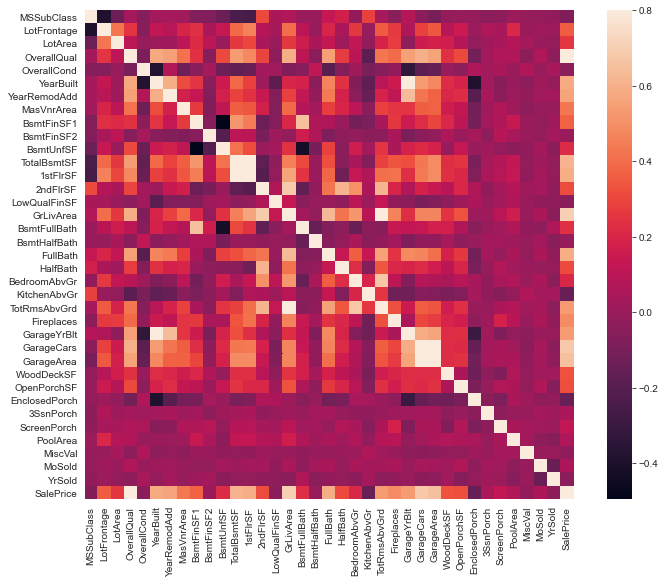

In [14]:
# Correlation matrix - observe how variables relate to each other. Highly correlated variables tend to mess with algorithms
corrmat_train = train_df.corr() #correlation matrix
f, ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat_train, vmax =0.8, square=True)

In [16]:
# Spearman's correlation coefficient is more robust to outliers than Pearson's correlation coefficient. 
# Also, The fundamental difference between the two correlation coefficients is that the Pearson coefficient works with a linear relationship between 
# the two variables whereas the Spearman Coefficient works with monotonic relationships as well.
corrmat_train_spearman = train_df.corr(method='spearman')
corrmat_train_spearman

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000,-0.314,-0.270,0.108,-0.072,0.036,0.007,0.025,-0.108,-0.084,...,0.023,0.032,0.011,-0.036,-0.022,0.033,-0.033,0.018,-0.027,0.007
LotFrontage,-0.314,1.000,0.650,0.255,-0.083,0.195,0.117,0.259,0.154,0.053,...,0.109,0.178,-0.096,0.064,0.044,0.085,0.024,0.026,0.003,0.409
LotArea,-0.270,0.650,1.000,0.233,-0.047,0.103,0.075,0.178,0.172,0.072,...,0.184,0.177,-0.067,0.062,0.092,0.084,0.059,0.006,-0.027,0.456
OverallQual,0.108,0.255,0.233,1.000,-0.178,0.647,0.558,0.414,0.133,-0.118,...,0.259,0.435,-0.162,0.033,0.046,0.057,-0.088,0.061,-0.025,0.810
OverallCond,-0.072,-0.083,-0.047,-0.178,1.000,-0.417,-0.041,-0.179,-0.011,0.102,...,-0.043,-0.133,0.110,0.032,0.075,-0.006,0.087,-0.007,0.050,-0.129
YearBuilt,0.036,0.195,0.103,0.647,-0.417,1.000,0.684,0.402,0.190,-0.112,...,0.288,0.393,-0.409,0.022,-0.073,0.009,-0.092,0.019,-0.014,0.653
YearRemodAdd,0.007,0.117,0.075,0.558,-0.041,0.684,1.000,0.234,0.063,-0.126,...,0.230,0.353,-0.235,0.052,-0.046,0.003,-0.091,0.021,0.045,0.571
MasVnrArea,0.025,0.259,0.178,0.414,-0.179,0.402,0.234,1.000,0.242,-0.061,...,0.174,0.209,-0.180,0.041,0.038,0.005,-0.050,0.018,0.001,0.421
BsmtFinSF1,-0.108,0.154,0.172,0.133,-0.011,0.190,0.063,0.242,1.000,0.050,...,0.179,0.081,-0.148,0.047,0.072,0.058,0.005,-0.016,0.021,0.302
BsmtFinSF2,-0.084,0.053,0.072,-0.118,0.102,-0.112,-0.126,-0.061,0.050,1.000,...,0.069,-0.069,0.042,-0.016,0.059,0.068,0.030,-0.026,0.026,-0.039


**Rule of Thumb for Interpreting the Size of a Correlation Coefficient**

Size of Correlation	Interpretation
- .90 to 1.00 (−.90 to −1.00)	Very high positive (negative) correlation
- .70 to .90 (−.70 to −.90)	High positive (negative) correlation
- .50 to .70 (−.50 to −.70)	Moderate positive (negative) correlation
- .30 to .50 (−.30 to −.50)	Low positive (negative) correlation
- .00 to .30 (.00 to −.30)	negligible correlation

Source: Hinkle DE, Wiersma W, Jurs SG. Applied Statistics for the Behavioral Sciences. 5th ed. Boston: Houghton Mifflin; 2003.

#### Summary of possible multicollinearity
Very light and Very dark shaded areas denote higher colleration. Based on the charts and matrices we observe that certain variable pairs are highly correlated and potential candidates for removal/feature engineering. A few examples:
- (GarageYrBlt, YearBlt): seems intuitive that these would be the similar in many cases
- (GrLivArea, TotRmsAbvGrd) : the more rooms the larger the area, generally
- (EnclosedPortch, YearBuilt)
- (BsmntUnitSF, BsmtFullBath): as the number of full baths in the basement increases, we would expect a larger basement
- (OverallCond, YearBuilt): 'newer' homes would be in better condition than older homes
- (LotFrontage, MSSubclass): not sure what the relationship is, but suggest certain types of dwellings have more street connected to them


### SalePrice correlations
If we focus on the SalePrice variable we observe: 
 - **high +ve corelations (> 0.7)** with: "OverallQual", "GrLivArea", "GarageCars", "YearBuilt" 
 - **moderate +ve correlations (0.5 - 0.7)** with: "GarageArea", "TotBsmtSF", "1stFlrSF", "FullBath, "TotalRmsAbvGrd", "GarageYrBlt", "YearRemodAdd", "TotRmsAbvGrd", "Fireplaces", "OpenPorchSF, "LotArea"
 

In [17]:
#Check the variables that have the highest correlation with the target variable
train_df.corrwith(train_df["SalePrice"], method='spearman').sort_values(ascending=False)

SalePrice        1.000
OverallQual      0.810
GrLivArea        0.731
GarageCars       0.691
YearBuilt        0.653
GarageArea       0.649
FullBath         0.636
TotalBsmtSF      0.603
GarageYrBlt      0.594
1stFlrSF         0.575
YearRemodAdd     0.571
TotRmsAbvGrd     0.533
Fireplaces       0.519
OpenPorchSF      0.478
LotArea          0.456
MasVnrArea       0.421
LotFrontage      0.409
WoodDeckSF       0.354
HalfBath         0.343
BsmtFinSF1       0.302
2ndFlrSF         0.294
BedroomAbvGr     0.235
BsmtFullBath     0.225
BsmtUnfSF        0.185
ScreenPorch      0.100
MoSold           0.069
3SsnPorch        0.065
PoolArea         0.058
MSSubClass       0.007
BsmtHalfBath    -0.012
YrSold          -0.030
BsmtFinSF2      -0.039
MiscVal         -0.063
LowQualFinSF    -0.068
OverallCond     -0.129
KitchenAbvGr    -0.165
EnclosedPorch   -0.218
dtype: float64

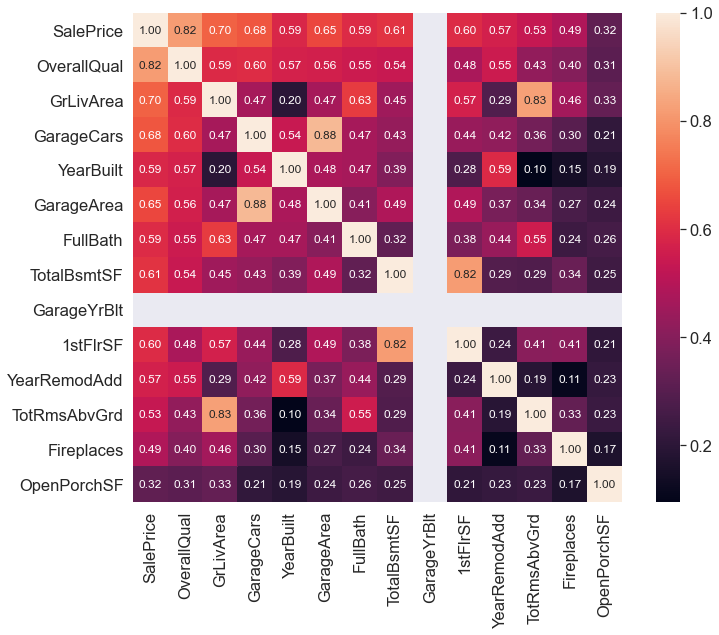

In [18]:
## Focusing on the variables that have the highest correlations with Saleprice 

# corrmat_train = train_df.corr() #correlation matrix
# f, ax = plt.subplots(figsize = (12,9))
# sns.heatmap(corrmat_train, vmax =0.8, square=True)

k = 14
cols = corrmat_train_spearman.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale = 1.5)
f, ax = plt.subplots(figsize = (12,9))
hm = sns.heatmap(cm, cbar = True, annot = True, square = True,
                fmt = '.2f', annot_kws = {'size':12}, 
                yticklabels=cols.values, xticklabels=cols.values)
plt.show()


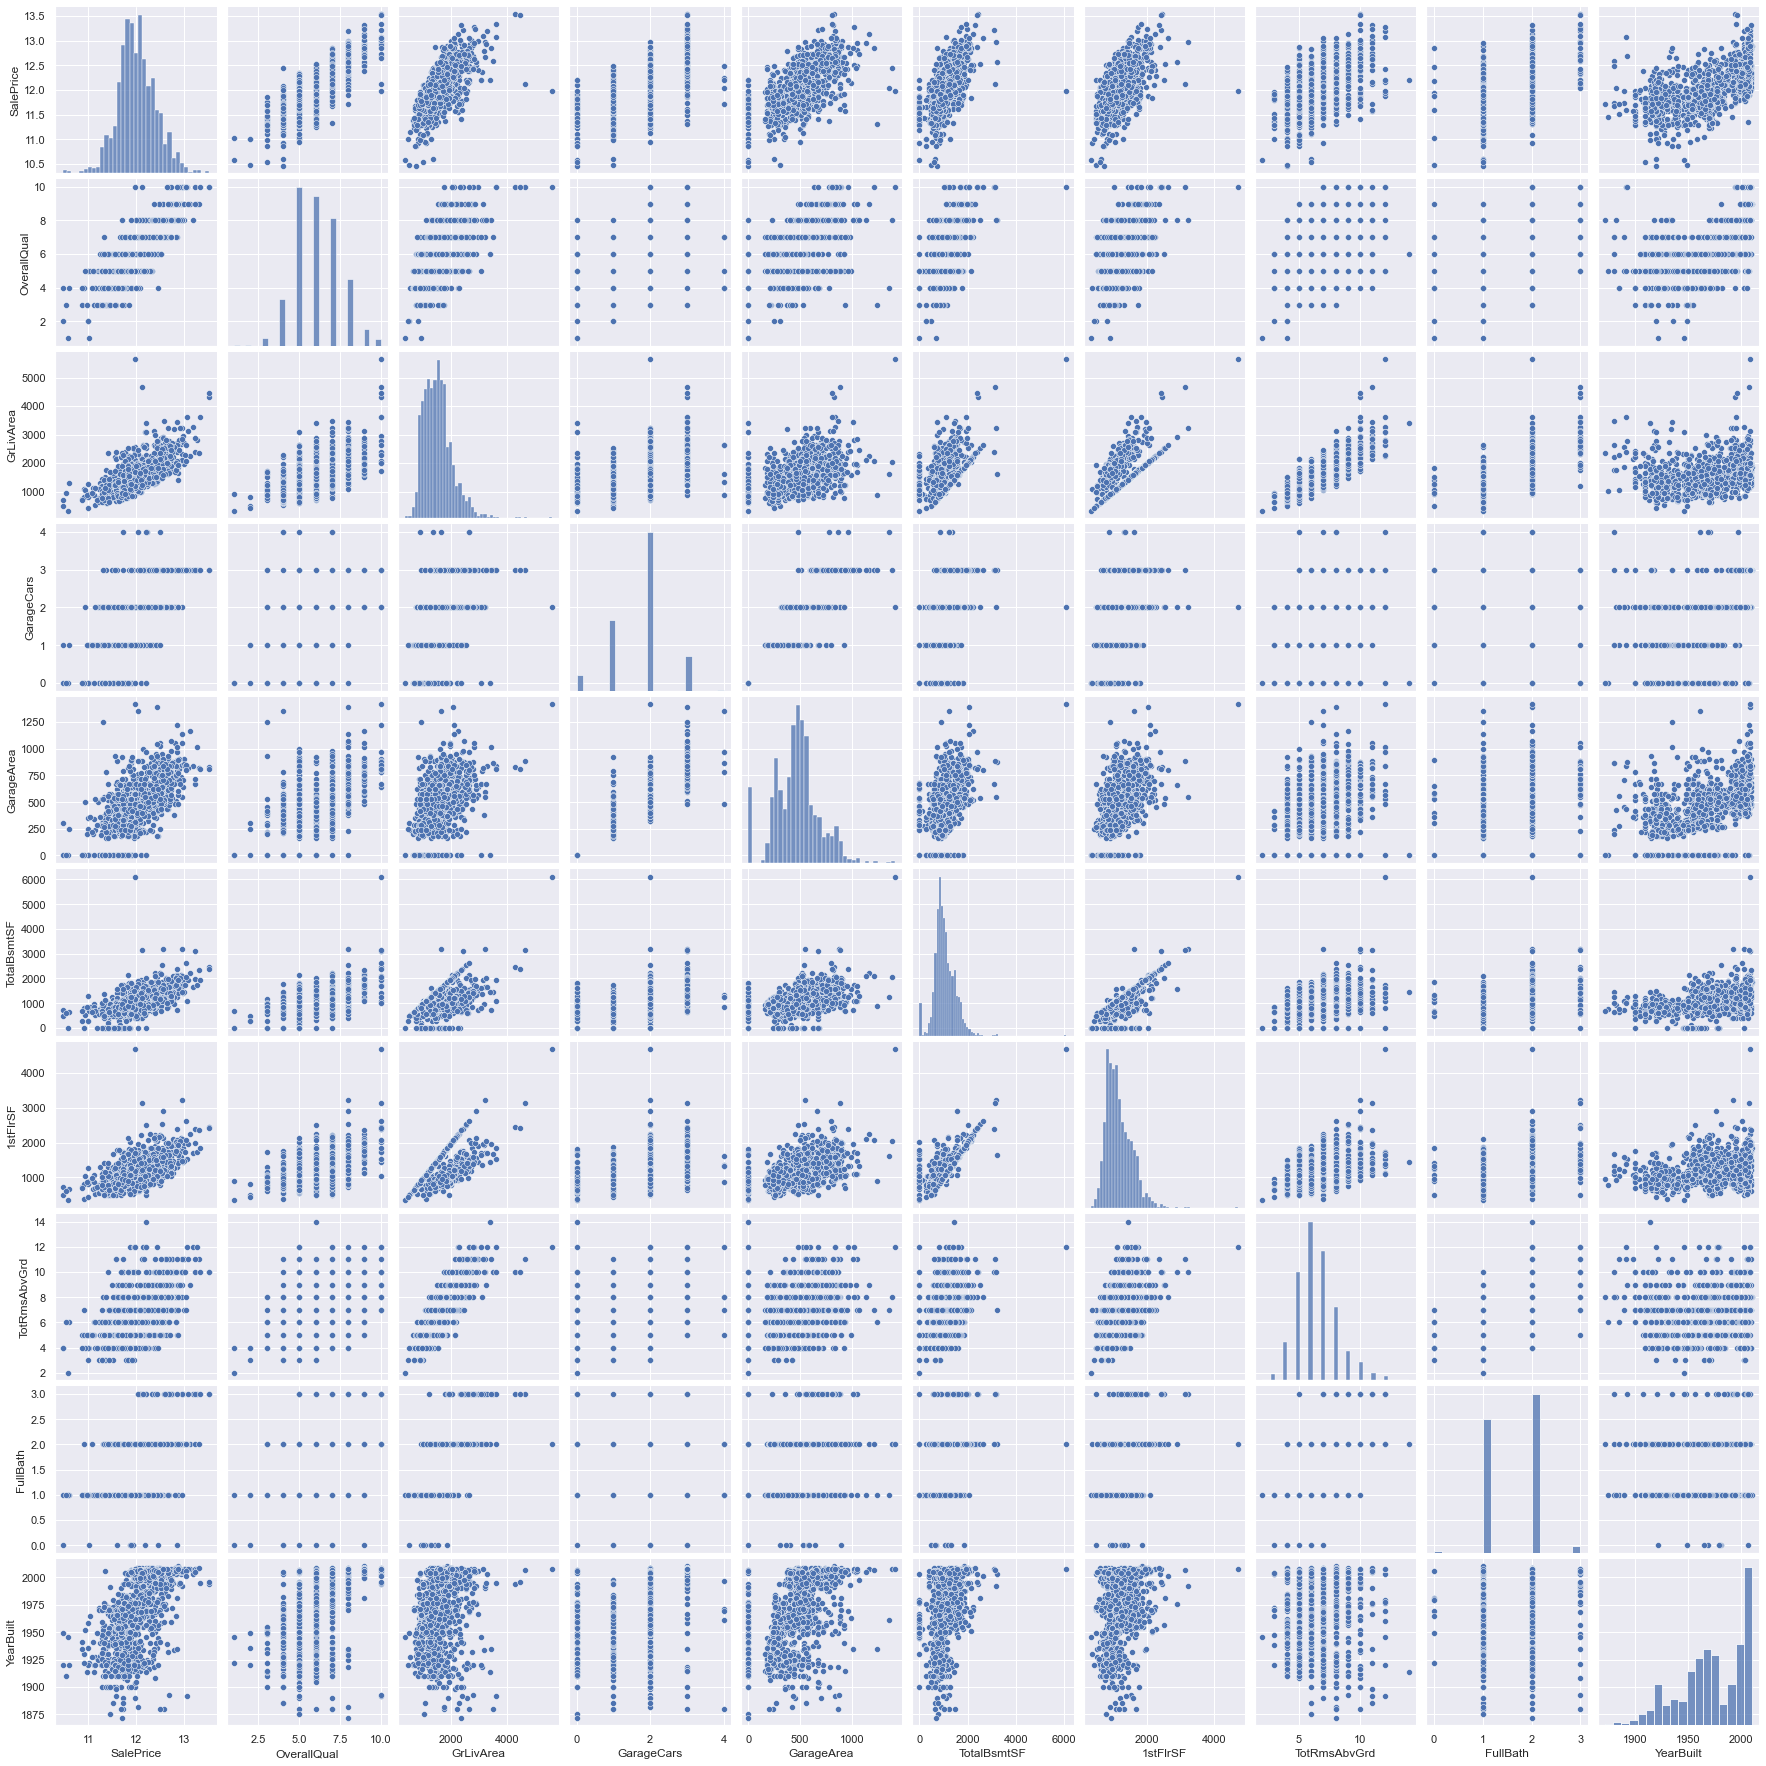

In [19]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
        'TotalBsmtSF', '1stFlrSF', 'TotRmsAbvGrd', 'FullBath', 'YearBuilt']
sns.pairplot(train_df[cols], height = 2.5)
plt.show();

In the chart, structured relationships (i.e. those that you can represent with a line) indicate correlation, the others suggest little to no correlation.

## Data Preparation

#### Outliers

The author of the dataset recommends removing houses with more than 4000 square feet

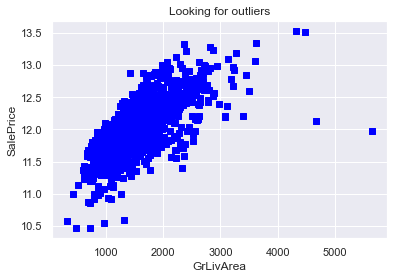

In [20]:
plt.scatter(train_df.GrLivArea, train_df.SalePrice, c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

In [21]:
# Remove obs where GrLivArea is above 4000sqft
train_df = train_df[train_df.GrLivArea < 4000]

#### Checking for missing values in the dataset

Missing data can prevent certain algorithms from working (e.g. Linear Discriminant Analysis). We check the dataset to see the extent to which missing values appear in our dataframe.


In [22]:
total_missing = train_df.isnull().sum().sort_values(ascending = False)
#print(total_missing)
percent_missing = train_df.isnull().mean().round(3) * 100
#print(percent_missing)

missing_data = pd.concat([total_missing, percent_missing], axis= 1, keys= ["Values.Missing", "Pct.Missing"])
missing_data.head(20)

,Values.Missing,Pct.Missing
PoolQC,1451,99.700
MiscFeature,1402,96.300
Alley,1365,93.800
Fence,1176,80.800
FireplaceQu,690,47.400
LotFrontage,259,17.800
GarageType,81,5.600
GarageCond,81,5.600
GarageFinish,81,5.600
GarageQual,81,5.600


We observe that 4 variables have over 80% of the values missing. **BAD**.
Looking closer, some possible reasons:
- PoolQC: many houses do not have pools (since they are a luxury). 
- MiscFeature: according to the data dictionary, this could be "elevators, 2nd garage, sheds, tennis courts i.e. uncommon stuff. 
- Alley: over 90% of houses in the dataset do not have alley access. 
- Fence: over 80% do not have fences. 

> We will remove columns with high percent of missing values, and **exclude the columns that have 80%+ missing values.**


We also see that some columns have a small number of rows missing values e.g. Electrical, MasnVnrX, GaragX:
- MasVnrX: ditto. **Delete the rows/obs with missing values**
- Electrical: just one row missing data. **Delete**

#### Remove columns with 80%+ missing values

In [23]:
train_df = train_df.loc[ : , train_df.isnull().mean() < 0.8] # include columns that have less than 80% missing values

print("There are now", str(train_df.shape[1]), "features in the dataframe after removing columns with 80%+ missing values") 

There are now 76 features in the dataframe after removing columns with 80%+ missing values


#### As appropriate, Impute values for columns with missing values

In [24]:
# Impute Lot Frontage based on median Lot Frontage in the house's neighborhood
train_df["LotFrontage"] = train_df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

#### Check remaining missing values

In [25]:
total_missing2 = train_df.isnull().sum().sort_values(ascending = False)
#print(total_missing)
percent_missing2 = train_df.isnull().mean().round(2) * 100
#percent_missing = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
#print(percent_missing)

missing_data2 = pd.concat([total_missing2, percent_missing2], axis= 1, keys= ["Values.Missing", "Pct.Missing"])
missing_data2[missing_data2["Values.Missing"] > 0]

,Values.Missing,Pct.Missing
FireplaceQu,690,47.000
GarageCond,81,6.000
GarageType,81,6.000
GarageYrBlt,81,6.000
GarageFinish,81,6.000
GarageQual,81,6.000
BsmtExposure,38,3.000
BsmtFinType2,38,3.000
BsmtFinType1,37,3.000
BsmtCond,37,3.000


In [26]:
# Remove rows with remaining missing values
train_df = train_df.dropna(subset= ['MasVnrType','MasVnrArea', "Electrical"])

In [27]:
total_missing3 = train_df.isnull().sum().sort_values(ascending = False)
#print(total_missing)
percent_missing3 = train_df.isnull().mean().round(2) * 100
percent_missing3 = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
#print(percent_missing)

missing_data3 = pd.concat([total_missing3, percent_missing3], axis= 1, keys= ["Values.Missing", "Pct.Missing"])
missing_data3[missing_data3["Values.Missing"] > 1]


,Values.Missing,Pct.Missing
FireplaceQu,685,0.473
GarageCond,81,0.056
GarageType,81,0.056
GarageYrBlt,81,0.056
GarageFinish,81,0.056
GarageQual,81,0.056
BsmtExposure,38,0.026
BsmtFinType2,38,0.026
BsmtFinType1,37,0.026
BsmtCond,37,0.026


## Data Cleaning: Feature Manipulation

#### Convert numerical features to categorical

In [28]:
# Numerical features to categorical
# Convert MSubClass and month to string objects since they are a nominal categorial variable
train_df["MSSubClass"] = train_df["MSSubClass"].astype("str")

# Can also consider converting month to string
# train_df = train_df.replace({"MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
#                             7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}})

#### Convert categorical vars to ordinal variables and handle missing values

In [29]:
# Alley : convert to ordinal variable
# already removed --> train_df["Alley"] = train_df["Alley"].map(lambda x: 1 if x == "Grv1" else 2 if x == "Pave" else 0)


# BASEMENT VARIABLES
    #convert string vars to ordered values
    # NAs = these are places without basements
train_df["BsmtQual"] = train_df["BsmtQual"].map(lambda x: 0 if x == False else 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x == "Gd" else 5)
train_df["BsmtCond"] = train_df["BsmtCond"].map(lambda x: 0 if x == False else 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x == "Gd" else 5)
train_df["BsmtExposure"] = train_df["BsmtExposure"].map(lambda x: 0 if x == False else 1 if x == "No" else 2 if x == "Mn" else 3 if x == "Av" else 4)
train_df["BsmtFinType1"] = train_df["BsmtFinType1"].map(lambda x: 0 if x == False else 1 if x == "Unf" else 2 if x == "LwQ" else 3 if x == "Rec" else 4 if x == "BLQ" else 5 if x == "ALQ" else 6)
train_df["BsmtFinType2"] = train_df["BsmtFinType2"].map(lambda x: 0 if x == False else 1 if x == "Unf" else 2 if x == "LwQ" else 3 if x == "Rec" else 4 if x == "BLQ" else 5 if x == "ALQ" else 6)

    # handle missing numerical data e.g. square footage - replace with 0s
train_df["BsmtUnfSF"] = train_df["BsmtUnfSF"].map(lambda x: 0 if "NaN" else x)
train_df["TotalBsmtSF"] = train_df["TotalBsmtSF"].map(lambda x: 0 if "NaN" else x)
train_df["BsmtFullBath"] = train_df["BsmtFullBath"].map(lambda x: 0 if "NaN" else x)
train_df["BsmtHalfBath"] = train_df["BsmtHalfBath"].map(lambda x: 0 if "NaN" else x)

# EXTERNAL FEATURE VARIABLES: convert to ordered numbers
train_df["ExterCond"] = train_df["ExterCond"].map(lambda x: 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x== "Gd" else 5 if x == "Ex" else 0)
train_df["ExterQual"] = train_df["ExterQual"].map(lambda x: 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x== "Gd" else 5 if x == "Ex" else 0)

# GARAGE VARIABLES
    # convert quality and condition variables to ordered numbers
train_df["GarageQual"] = train_df["GarageQual"].map(lambda x: 0 if x == False else 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x == "Gd" else 5)
train_df["GarageCond"] = train_df["GarageCond"].map(lambda x: 0 if x == False else 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x == "Gd" else 5)

    # handle missing values in Garage Finish and Garage Type and GarageYr (likely indicate houses did not have garages)
train_df["GarageFinish"] = train_df["GarageFinish"].map(lambda x: 0 if x == False else 1 if x == "Unf" else 2 if x == "RFn" else 3)
train_df["GarageType"] = train_df["GarageType"].fillna("None")
train_df["GarageYrBlt"] = train_df["GarageYrBlt"].fillna(0)

# OTHER QUALITY VARIABLES
    # convert quality and condition to ordered numbers
train_df["HeatingQC"] = train_df["HeatingQC"].map(lambda x: 0 if x == False else 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x == "Gd" else 5)
train_df["KitchenQual"] = train_df["KitchenQual"].map(lambda x: 0 if x == False else 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x == "Gd" else 5)
    # NAs are likely homes without fireplaces
train_df["FireplaceQu"] = train_df["FireplaceQu"].map(lambda x: 0 if x == False else 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x == "Gd" else 5)
train_df["Functional"] = train_df["Functional"].map(lambda x: 0 if x == False else 1 if x == "Sal" else 2 if x == "Sev" else 3 if x == "Maj2" else 4 if x == "Maj1" else 5 if x == "Mod" 
                                                   else 6 if x == "Min2" else 7 if x == "Min1" else 8 if x == "Typ" else 9)

train_df  = train_df.replace({
    "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
    "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
    "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
    "Street" : {"Grvl" : 1, "Pave" : 2},
    "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}})


##### Zoning -- some houses are in "commercial" zones, which are technically not meant for residential buildings. We remove these rows

In [30]:
# Check the Zoning Column and indientfy the unique values
train_df.MSZoning.unique()
train_df.MSZoning.value_counts() 

# We see that there are 10 observations in commercial zones. We exclude these from the dataset

train_df = train_df[train_df["MSZoning"]!= 'C (all)']

In [31]:
train_df.MSZoning.value_counts() 

RL    1141
RM     218
FV      62
RH      16
Name: MSZoning, dtype: int64

##### SaleCondition - Some houses are listed as "abnormal sales" i.e. trade, foreclosure etc. Remove this obs in case these are atypical

In [32]:
train_df.SaleCondition.value_counts()

train_df = train_df[train_df["SaleCondition"]!= 'Abnorml']
train_df = train_df[train_df["SaleCondition"]!= 'Family']

#### Feature Engineering, contd - consolidating features

In [33]:
# Consolidate porch variables
train_df['TotalPorchArea'] = (train_df["WoodDeckSF"] + train_df["OpenPorchSF"] + train_df["EnclosedPorch"] 
                                + train_df["3SsnPorch"] + train_df["ScreenPorch"])
# consolidate number of bathrooms
train_df['Total_Bathrooms'] = (train_df['FullBath'] 
                               + (0.5 * train_df['HalfBath']) 
                               + train_df['BsmtFullBath'] 
                               + (0.5 * train_df['BsmtHalfBath'])
                              )


# Calculate a total square footage for the home - buyers typically look at this when evaluating homes
train_df['TotalSqFeet'] = train_df["GrLivArea"] + train_df["TotalBsmtSF"]

seasons = {1: 'Winter', 2:'Winter', 3: 'Spring', 4: 'Spring', 
           5:'Spring', 6: 'Summer', 7: 'Summer', 8:'Summer', 
           9: 'Fall', 10: 'Fall', 11:'Fall', 12: 'Winter'}
train_df['SeasonSold'] = train_df["MoSold"].apply(lambda x: seasons[x])

train_df['Age'] = train_df.apply(lambda x: x['YrSold'] - x['YearBuilt'] if (x['YearBuilt']<x['YearRemodAdd']) 
                                                           else (x['YrSold']-x['YearRemodAdd']), axis=1)

#### Remove other features that are unlikely to be necessary either because of low variance or overlap with other features

In [34]:
train_df = train_df.drop(columns = ["WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch","ScreenPorch",#consolidated
                                    "GrLivArea", "TotalBsmtSF",'1stFlrSF', '2ndFlrSF',  # captured in TotalSqSFeet
                                    'FullBath','HalfBath', 'BsmtFullBath','BsmtHalfBath', # captured in Total_Bathrooms
                                    'GarageYrBlt', 'YearRemodAdd', 'YearBuilt', 'YrSold',  # captured in Age
                                    "MoSold", # captured in Season
                                    "ExterQual", # high correlation with Overall Quality
                                    "MiscVal", "PoolArea", # low variance 
                                    "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF"]) # captured in TotalBsmntSF

# train_df = train_df.drop(columns = ["WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch","ScreenPorch",#consolidated
#                                     "GrLivArea", "TotalBsmtSF",'1stFlrSF', '2ndFlrSF',  # captured in TotalSqSFeet
#                                     'FullBath','HalfBath', 'BsmtFullBath','BsmtHalfBath', # captured in Total_Bathrooms,
#                                     "Total_Bathrooms", # high correlation with Total Square Feet
#                                     'GarageYrBlt', 'YearRemodAdd', 'YearBuilt', 'YrSold',  # captured in Age
#                                     'GarageArea', # high correlation with Garage Cars which has a stronger relationship with Saleprice
#                                     'TotRmsAbvGrd', # high correlation with Total SquareFeet which has a stronger relationship with Saleprice
#                                     "ExterQual", # high correlation with Overall Quality
#                                     "MiscVal", "PoolArea", # low variance 
#                                     "LotFrontage", # high correlation with Lot Area, which has a higher correlation with Salesprice
#                                     "MoSold", # captured in Season
#                                     "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF",
#                                    ]) # captured in TotalBsmntSF

In [35]:
train_df.shape

(1342, 57)

In [36]:
train_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition', 'SalePrice', 'TotalPorchArea', 'Total_Bathrooms',
       'TotalSqFeet', 'SeasonSold', 'Age'],
      dtype='object')

In [37]:
total_missing4 = train_df.isnull().sum().sort_values(ascending = False)
#print(total_missing)
percent_missing4 = train_df.isnull().mean().round(2) * 100
percent_missing4 = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
#print(percent_missing)

missing_data4 = pd.concat([total_missing4, percent_missing4], axis= 1, keys= ["Values.Missing", "Pct.Missing"])
missing_data4[missing_data4["Values.Missing"] > 1]

,Values.Missing,Pct.Missing


*** Dataset no longer contains an NAs ***

## Evaluating Performance of Linear Models: Regression, Lasso and Ridge

#### Linear models in sci-kit learn only function with numerical features. We will need to identify categorical features and convert using OneHotEncoder

In [38]:
from numpy import std
from numpy import absolute
from numpy import mean
from scipy.stats import skew


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Spot-Check Algorithms
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error


#### Load dataset

In [39]:
#Load dataset
house_data = train_df

# Split into feature and target
target_name = "SalePrice"
y = house_data[target_name]

# Create features  variable — all features except SalesPrice
X = house_data.drop(columns = "SalePrice", axis=1)

In [40]:
# Preprocessing - separate categorical from numerical features

categorical_features = house_data.select_dtypes(include = ["object"]).columns
numerical_features = house_data.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop("SalePrice")

print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))

train_num = house_data[numerical_features]
train_cat = house_data[categorical_features]

#Confirm that there are no missing values
print("NAs for categorical features in train : " + str(train_cat.isnull().values.sum()))
print("NAs for numerical features in train : " + str(train_num.isnull().values.sum()))


Numerical features : 34
Categorical features : 22
NAs for categorical features in train : 0
NAs for numerical features in train : 0


In [41]:
# Log transform skewed numerical features to reduce impact of outliers
skewness = train_num.apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]
print(str(skewness.shape[0]) + " skewed numerical features to log transform")
skewed_features = skewness.index # pulls index for columns that are skewed
train_num[skewed_features] = np.log1p(train_num[skewed_features]) # transforms skewed features

24 skewed numerical features to log transform


/Users/jeremyosir/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [42]:
skewness

LotFrontage        1.609
LotArea           12.406
Street           -18.235
LotShape          -1.286
LandSlope         -4.903
OverallCond        0.778
MasVnrArea         2.630
ExterCond          1.445
BsmtCond           2.466
BsmtExposure       1.042
BsmtFinType2       2.992
HeatingQC         -0.580
LowQualFinSF       9.797
KitchenAbvGr       4.609
TotRmsAbvGrd       0.620
Functional        -4.809
Fireplaces         0.593
FireplaceQu       -0.910
GarageQual         2.591
GarageCond         2.536
PavedDrive        -3.403
TotalPorchArea     1.105
TotalSqFeet        0.811
Age                0.638
dtype: float64

In [43]:
skewness_log = train_num.apply(lambda x: skew(x))
skewness_log = skewness_log[abs(skewness_log)>0.5]
skewness_log

LotFrontage       -0.997
Street           -18.235
LotShape          -1.987
LandSlope         -5.518
BsmtCond           1.135
BsmtExposure       0.882
BsmtFinType2       2.608
HeatingQC         -0.816
LowQualFinSF       7.978
KitchenAbvGr       3.907
Functional        -5.382
FireplaceQu       -1.632
GarageQual         1.374
GarageCond         0.882
PavedDrive        -3.549
TotalPorchArea    -1.326
Age               -0.804
dtype: float64

In [44]:
# Create dummy features for categorical values via one-hot encoding
train_cat = pd.get_dummies(train_cat)
train_cat.head(5)

# ohe = OneHotEncoder(handle_unknown='ignore')
# feature_arr = ohe.fit_transform(train_cat).toarray()
# feature_labels = ohe.get_feature_names()

# feature_labels = np.array(feature_labels).ravel()
# features = pd.DataFrame(feature_arr, columns=feature_labels)

# features
#train_cat = enc.transform(train_cat).toarray()
# ohe.fit(X)
# X_ohe = ohe.transform(X).toarray()

# ohe = OneHotEncoder()
# ohe.fit(train_cat)
# train_cat = ohe.transform(train_cat).toarray()

# # check the resulting dataframe to see that each value in each category receives its own column
# ohe_df = pd.DataFrame(train_cat, columns = ohe.get_feature_names(train_cat.columns))
# ohe_df.head()


,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,...,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SeasonSold_Fall,SeasonSold_Spring,SeasonSold_Summer,SeasonSold_Winter
0,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,1
5,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0


In [45]:
train_cat.head(5)

,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,...,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SeasonSold_Fall,SeasonSold_Spring,SeasonSold_Summer,SeasonSold_Winter
0,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,1
5,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0


In [46]:
train_cat.columns

Index(['MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'MSSubClass_20',
       'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60',
       ...
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial', 'SeasonSold_Fall', 'SeasonSold_Spring',
       'SeasonSold_Summer', 'SeasonSold_Winter'],
      dtype='object', length=172)

In [47]:
train_num.head(5)

,LotFrontage,LotArea,Street,LotShape,Utilities,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterCond,...,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,TotalPorchArea,Total_Bathrooms,TotalSqFeet,Age
0,4.190,9.042,1.099,1.609,4,1.386,7,1.792,5.283,1.386,...,2,2,548,1.386,1.386,1.099,4.127,2.500,7.445,1.792
1,4.394,9.170,1.099,1.609,4,1.386,6,2.197,0.000,1.386,...,2,2,460,1.386,1.386,1.099,5.700,2.000,7.141,3.466
2,4.234,9.328,1.099,1.386,4,1.386,7,1.792,5.094,1.386,...,2,2,608,1.386,1.386,1.099,3.761,2.500,7.488,2.079
4,4.443,9.565,1.099,1.386,4,1.386,8,1.792,5.861,1.386,...,2,3,836,1.386,1.386,1.099,5.624,2.500,7.696,2.197
5,4.454,9.555,1.099,1.386,4,1.386,5,1.792,0.000,1.386,...,1,2,480,1.386,1.386,1.099,5.969,1.500,7.217,2.833


In [48]:
train = pd.concat([train_cat, train_num], axis = 1)
print("New number of features : " + str(train.shape[1]))



New number of features : 206


In [49]:
train.head(10)

,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,...,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,TotalPorchArea,Total_Bathrooms,TotalSqFeet,Age
0,0,0,0,0,0,0,0,0,0,1,...,2,2,548,1.386,1.386,1.099,4.127,2.500,7.445,1.792
1,0,0,0,0,1,0,0,0,0,0,...,2,2,460,1.386,1.386,1.099,5.700,2.000,7.141,3.466
2,0,0,0,0,0,0,0,0,0,1,...,2,2,608,1.386,1.386,1.099,3.761,2.500,7.488,2.079
4,0,0,0,0,0,0,0,0,0,1,...,2,3,836,1.386,1.386,1.099,5.624,2.500,7.696,2.197
5,0,0,0,0,0,0,0,0,1,0,...,1,2,480,1.386,1.386,1.099,5.969,1.500,7.217,2.833
6,0,0,0,0,1,0,0,0,0,0,...,2,2,636,1.386,1.386,1.099,5.746,2.000,7.435,1.386
7,0,0,0,0,0,0,0,0,0,1,...,2,2,484,1.386,1.386,1.099,6.504,2.500,7.645,3.611
9,0,0,0,1,0,0,0,0,0,0,...,2,1,205,1.609,1.386,1.099,1.609,1.000,6.983,4.248
10,0,0,0,0,1,0,0,0,0,0,...,1,1,384,1.386,1.386,1.099,0.000,1.000,6.948,3.784
11,0,0,0,0,0,0,0,0,0,1,...,3,3,736,1.386,1.386,1.099,5.130,3.000,7.751,0.693


In [50]:
# Partition the dataset in train + validation sets
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = 0.3, random_state = 0)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (939, 206)
X_test : (403, 206)
y_train : (939,)
y_test : (403,)


In [51]:
X_train.shape


(939, 206)

## Modeling

#### Linear Regression (unscaled numerical features, encoded categorical features)

In [52]:
lr_1 = LinearRegression()
lr_1.fit(X_train, y_train)
train_lr1_score = lr_1.score(X_train, y_train)
test_lr1_score  = lr_1.score(X_test, y_test)

print("Linear model (basic), Train Accuracy: {:.2f}".format(train_lr1_score))
print("Linear model (basic), Test Accuracy: {:.2f}".format(test_lr1_score))

Linear model (basic), Train Accuracy: 0.95
Linear model (basic), Test Accuracy: 0.91


In [53]:
y_hat_test = lr_1.predict(X_test)
# plot y_test against y_hat
residuals_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_hat_test,
                             'Residuals': (y_hat_test - y_test), 
                             'diff%': (abs(y_hat_test - y_test)/y_test)*100}, 
                             columns=['Actual', 'Predicted','Residuals', 'diff%'])

<AxesSubplot:xlabel='Actual'>

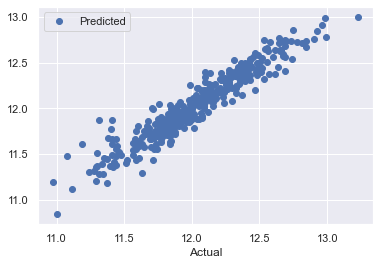

In [54]:
residuals_df.plot(x = "Actual"  , y = "Predicted" , style = "o")

<AxesSubplot:xlabel='Predicted'>

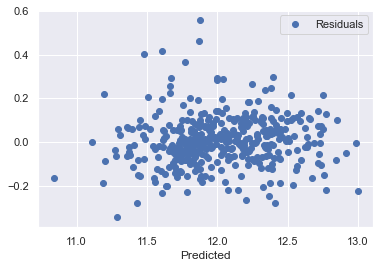

In [55]:
residuals_df.plot(x = "Predicted", y = "Residuals", style = "o")

In [56]:
lr1_coef_df = pd.DataFrame(lr_1.coef_, X_train.columns, columns=['Coefficient'])
#coeff_df[coeff_df['Coefficient']]
sorted_lr1_coef = np.abs(lr1_coef_df).sort_values(by = ['Coefficient'],ascending=False)
sorted_lr1_coef
sorted_lr1_coef.head(10)

,Coefficient
TotalSqFeet,0.491
HouseStyle_1.5Unf,0.279
MSSubClass_45,0.268
OverallCond,0.255
RoofMatl_WdShngl,0.240
SaleCondition_AdjLand,0.235
HouseStyle_2.5Unf,0.227
Condition1_RRNn,0.204
Functional,0.194
SaleCondition_Partial,0.188


In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# See our Squared Mean Error score and Root Mean Squared Error:
test_mse = mean_squared_error(y_test, y_hat_test)
test_rmse = np.sqrt(test_mse)
print("Test MSE: {}".format(test_rmse))
# See our Mean Absolute Error
test_mae = mean_absolute_error(y_test, y_hat_test)
test_mae
print("Test MAE: {}".format(test_mae))



Test MSE: 0.11533640715243455
Test MAE: 0.08510120034742144


##### Model accuracy is 95% for the train set, and 91% for the test set. Suggests some model overfitting. 
##### Next, will try lasso and ridge regularization models

### Ridge Regularization

In [58]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression

ridge = Ridge()
lasso = Lasso()
net   = ElasticNet()

#### Simple ridge model with alpha = 1

In [59]:
ridge.set_params(alpha=1.0)
ridge.fit(X_train, y_train)
train_ridge_score = ridge.score(X_train, y_train)
test_ridge_score =ridge.score(X_test, y_test)

print("Ridge model, Train Accuracy: {:.2f}".format(train_ridge_score))
print("Ridge model, Test Accuracy: {:.2f}".format(test_ridge_score))

Ridge model, Train Accuracy: 0.94
Ridge model, Test Accuracy: 0.92


##### Ridge model with alpha =1 has lower train accuracy (94%) than basic linear model. But test accuracy is higher than basic linear model (92%). 


#### Ridge model, tuning alpha

Text(0, 0.5, 'slope values')

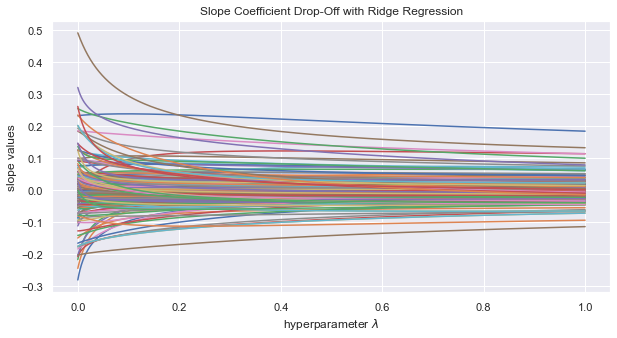

In [60]:
train_r2 = []
test_r2  = []
coefs = []
alphaRange = np.linspace(.00001, 1, 1000)

for alpha in alphaRange:
    ridge.set_params(alpha=alpha, normalize=True)  
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    train_r2.append(ridge.score(X_train, y_train))
    test_r2.append(ridge.score(X_test, y_test))
coefs = pd.DataFrame(coefs, index = alphaRange, columns = X_train.columns)

# Plot change in coefficients with different values of alpha
plt.rcParams['figure.figsize'] = (10,5)
for name in coefs.iloc[0, :].sort_values().index:
    plt.plot(coefs.index, coefs[name], label=name)
# plt.legend(loc=4)   
plt.title(r'Slope Coefficient Drop-Off with Ridge Regression')
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')

In [61]:
alphaRange[np.array(test_r2) == max(test_r2)] # index value of alpha that corresponds with highest test r2 index

array([0.11112])

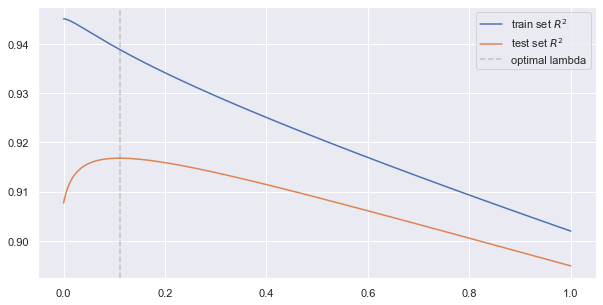

In [62]:
plt.plot(alphaRange, train_r2, label=r'train set $R^2$')
plt.plot(alphaRange, test_r2, label=r'test set $R^2$')
highest_test_alpha = alphaRange[np.array(test_r2) == max(test_r2)]
plt.axvline(highest_test_alpha, linestyle='--', color='grey', label='optimal lambda', alpha=0.4)
plt.legend(loc=1)

The Ridge (best alpha) train score is: 0.94
The Ridge (best alpha) test score is: 0.92 
Ridge picked 198 features and eliminated the other 8 features


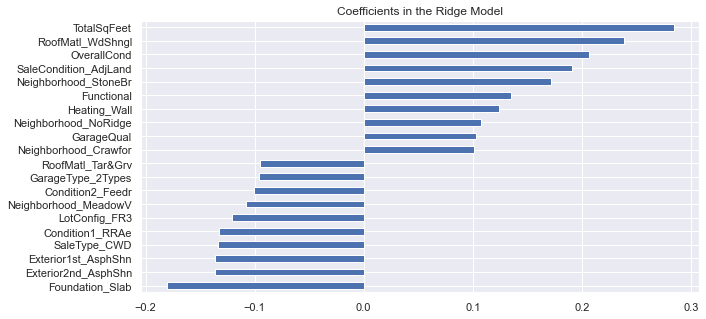

In [63]:
ridge.set_params(normalize=True, alpha=highest_test_alpha)
ridge.fit(X_train, y_train)
print("The Ridge (best alpha) train score is: {:.2f}".format(ridge.score(X_train, y_train)))
print("The Ridge (best alpha) test score is: {:.2f} ".format(ridge.score(X_test, y_test)))

# Plot important coefficients
coefs = pd.Series(ridge.coef_, index = X_train.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " + 
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()


#### Lasso Regularization

##### Lasso, tuning alpha

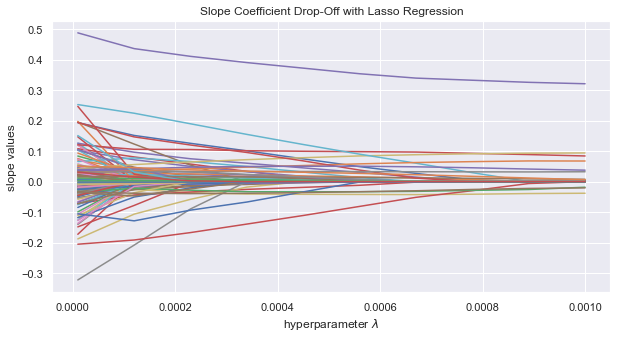

Lasso picked 13 features and eliminated the other 193 features


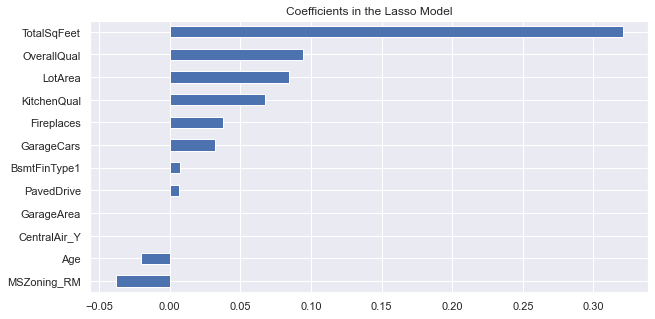

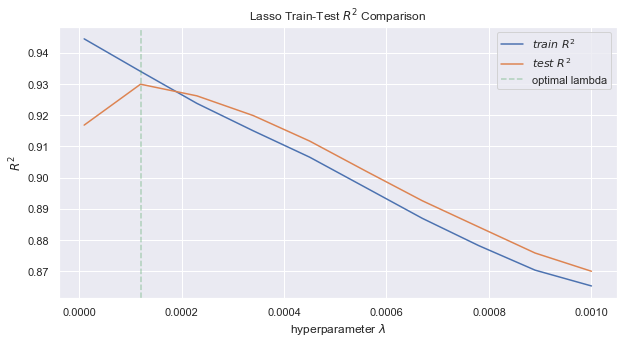

In [64]:
train_r2_lasso = []
test_r2_lasso  = []
coefs_lasso = []
alphaRange = np.linspace(0.00001, 0.001, 10)

for alpha in alphaRange:
    lasso.set_params(alpha=alpha, normalize=True)  
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)
    train_r2_lasso.append(lasso.score(X_train, y_train))
    test_r2_lasso.append(lasso.score(X_test, y_test))
coefs_lasso = pd.DataFrame(coefs_lasso, index = alphaRange, columns = X_train.columns)

# Plot change in coefficients with different values of alpha
plt.rcParams['figure.figsize'] = (10,5)

for name in coefs_lasso.columns:
    plt.plot(coefs_lasso.index, coefs_lasso[name], label=name)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')
plt.title(r'Slope Coefficient Drop-Off with Lasso Regression')
plt.show()

# Plot important coefficients

coefs = pd.Series(lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " + 
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(2),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()



# Plot R2 for different alphas
lasso_scores_train = np.array(train_r2_lasso) 
lasso_scores_test  = np.array(test_r2_lasso)

plt.plot(alphaRange, lasso_scores_train, label=r'$train\ R^2$')
plt.plot(alphaRange, lasso_scores_test, label=r'$test\ R^2$')
plt.title(r'Lasso Train-Test $R^2$ Comparison')
# lasso_underfit = lasso_scores_train < lasso_scores_test
# last_underfit  = np.max(alphaRange[lasso_underfit])
lasso_overfit = alphaRange[lasso_scores_test < lasso_scores_train]
last_overfit = max(lasso_overfit)
#last_underfit  = np.max(alphaRange[lasso_underfit])

#highest_test_alpha = alphaRange[lasso_scores_test == max(lasso_scores_test)]


plt.axvline(last_overfit, linestyle='--', color='g', label='optimal lambda', alpha=0.4)
plt.legend(loc=1)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')
plt.show()

# for name in coefs_lasso.iloc[0, :].sort_values().index:
#     plt.plot(coefs.index, coefs_lasso[name], label=name)
# # plt.legend(loc=4)   
# plt.title(r'Slope Coefficient Drop-Off with Lasso Regression')
# plt.xlabel(r'hyperparameter $\lambda$')
# plt.ylabel(r'slope values')

In [65]:
coefs.sort_values(ascending=False).head(20)

TotalSqFeet         0.321
OverallQual         0.094
LotArea             0.084
KitchenQual         0.068
Fireplaces          0.038
GarageCars          0.032
BsmtFinType1        0.008
PavedDrive          0.006
GarageArea          0.000
CentralAir_Y        0.000
Condition2_Norm     0.000
Condition2_PosA     0.000
Condition2_PosN    -0.000
Condition2_RRAe    -0.000
Condition2_RRNn    -0.000
Condition2_RRAn    -0.000
BldgType_1Fam       0.000
BldgType_2fmCon    -0.000
BldgType_Duplex    -0.000
Condition2_Feedr   -0.000
dtype: float64

In [66]:
coefs.sort_values(ascending=False).tail(20)

Electrical_FuseA     -0.000
Heating_Wall         -0.000
Heating_OthW          0.000
Heating_Grav         -0.000
Heating_GasW          0.000
Heating_GasA          0.000
Heating_Floor         0.000
Foundation_Wood      -0.000
Foundation_Stone      0.000
Foundation_Slab      -0.000
Foundation_PConc      0.000
Foundation_CBlock    -0.000
Foundation_BrkTil    -0.000
MasVnrType_Stone      0.000
MasVnrType_None      -0.000
MasVnrType_BrkFace    0.000
MasVnrType_BrkCmn     0.000
CentralAir_N         -0.018
Age                  -0.021
MSZoning_RM          -0.038
dtype: float64

In [67]:
lasso.set_params(alpha = last_overfit, normalize = True)
lasso.fit(X_train, y_train)
print("The Lasso model (best alpha = {}) train score is: {:.2f}".format(last_overfit,lasso.score(X_train, y_train)))
print("The Lasso model (best alpha = {}) test score is: {:.2f} ".format(last_overfit,lasso.score(X_test, y_test)))

The Lasso model (best alpha = 0.00012) train score is: 0.93
The Lasso model (best alpha = 0.00012) test score is: 0.93 


## Evaluating Performance of Non-Linear Models: Random Forest

Decision Trees and Random Forest are useful predictive modelling algorithms. They have several advantages that we can take advantage of:
- Can be used for regression and classification problems 
- Work well with categorical and numeric data
- Data does not need to be rescaled
- Can handle missing values
- Handles non-linear inputs
- Robust to outliers
- In the case of DTs - easy to interpret. Random Forests are a bit more complex

Decision trees are prone to overfitting. Random Forests addresses this by averaging the results (bagging/ensembling) of several decision trees, thus **1)** lowering the risk of overfitting and also **2)** reducing the model variance .

In [68]:
# load libraries
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder


## Random Forest

In [69]:
# Define a Random Forest Regressor model
rf_model_allCols = RandomForestRegressor(random_state =1)
rf_model_allCols.fit(X_train, y_train)
rf_model_allCols_predictions = rf_model_allCols.predict(X_test)

# Check the error
train_error = (1 - rf_model_allCols.score(X_train, y_train))
test_error = (1 - rf_model_allCols.score(X_test, y_test))
    # check MAE
rf_model_allCols_test_mae = mean_absolute_error(rf_model_allCols_predictions, y_test)

print("Training Accuracy: {:,.05f}".format(rf_model_allCols.score(X_train, y_train)))
print("Training Error: {:,.05f}".format(train_error))
print("Test Accuracy: {:,.05f}".format(rf_model_allCols.score(X_test, y_test)))
print("Test Error is: {:,.05f}".format(test_error))
print("Validation MAE for Random Forest Model: {:,.0f}".format(rf_model_allCols_test_mae))

# Training Accuracy: 0.98228
# Training Error: 0.01772
# Test Accuracy: 0.89594
# Test Error is: 0.10406
# Validation MAE for Random Forest Model: 0

Training Accuracy: 0.98176
Training Error: 0.01824
Test Accuracy: 0.89308
Test Error is: 0.10692
Validation MAE for Random Forest Model: 0


In [70]:
rf_feature_importance = rf_model_allCols.feature_importances_
pd.Series(rf_feature_importance, index = X_train.columns).sort_values(ascending=False).head(15)

OverallQual         0.572
TotalSqFeet         0.133
GarageCars          0.044
LotArea             0.031
GarageArea          0.029
Age                 0.022
LotFrontage         0.012
TotalPorchArea      0.011
OverallCond         0.009
GarageType_Attchd   0.008
KitchenQual         0.007
Total_Bathrooms     0.006
MSZoning_RM         0.006
TotRmsAbvGrd        0.006
FireplaceQu         0.006
dtype: float64

#### Random forest had 98% accuracy on train set, and 89.5% accuracy on test. Overfitting

***Next we try using gridsearch to tune the Random Forest hyperparameters***

In [77]:
grid_para_forest = [{
    "n_estimators": [25, 50,100], #removed 25, 50
    'max_depth': [5,10,15,20],
    "min_samples_leaf": range(1,5),
    "min_samples_split": np.linspace(start=2, stop=30, num=15, dtype=int),
   # 'min_samples_split' : [3,4,6,10],
    "random_state": [42]}]
grid_search_forest = GridSearchCV(rf_model_allCols, grid_para_forest, cv=5, n_jobs=-1)
%time grid_search_forest.fit(X_train, y_train)

CPU times: user 15 s, sys: 1.45 s, total: 16.4 s
Wall time: 17min 24s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid=[{'max_depth': [5, 10, 15, 20],
                          'min_samples_leaf': range(1, 5),
                          'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]),
                          'n_estimators': [25, 50, 100],
                          'random_state': [42]}])

In [78]:
grid_search_forest.best_params_
# {'max_depth': 20,
#  'min_samples_leaf': 1,
#  'min_samples_split': 4,
#  'n_estimators': 100,
#  'random_state': 42}

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 100,
 'random_state': 42}

In [79]:
grid_search_forest.best_score_
#0.0.8719855360333568

0.8719855360333568

In [80]:
grid_search_forest.score(X_train, y_train)
# 0.9791950629817833


0.9791950629817833

In [81]:
grid_search_forest.score(X_test, y_test)
# 0.8906860022597638

0.8906860022597638

In [83]:
grid_search_rf_feature_importance = grid_search_forest.best_estimator_.feature_importances_
pd.Series(grid_search_rf_feature_importance, index = X_train.columns).sort_values(ascending=False).head(20)

OverallQual         0.570
TotalSqFeet         0.065
GrLivArea           0.064
1stFlrSF            0.046
GarageCars          0.031
LotArea             0.025
GarageArea          0.023
YearBuilt           0.019
YearRemodAdd        0.010
OverallCond         0.010
TotalPorchArea      0.009
ExterQual           0.008
LotFrontage         0.007
Total_Bathrooms     0.005
MSZoning_RM         0.005
KitchenQual         0.005
TotRmsAbvGrd        0.005
BsmtQual            0.004
GarageType_Attchd   0.004
MasVnrArea          0.004
dtype: float64

#### Re-run models on train data, but this time ONLY selecting the most important features

In [88]:
#Load dataset
train_df = pd.read_csv("./house-prices-data/train.csv")

# Log-transform sale price
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])
y = train_df["SalePrice"]

train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'Ope

In [89]:
train_df.MSSubClass.value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [90]:
# Alley : convert to ordinal variable
# already removed --> train_df["Alley"] = train_df["Alley"].map(lambda x: 1 if x == "Grv1" else 2 if x == "Pave" else 0)

train_df["MSSubClass"] = train_df["MSSubClass"].astype("str")


# BASEMENT VARIABLES
    #convert string vars to ordered values
    # NAs = these are places without basements
train_df["BsmtQual"] = train_df["BsmtQual"].map(lambda x: 0 if x == False else 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x == "Gd" else 5)
train_df["BsmtCond"] = train_df["BsmtCond"].map(lambda x: 0 if x == False else 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x == "Gd" else 5)
train_df["BsmtExposure"] = train_df["BsmtExposure"].map(lambda x: 0 if x == False else 1 if x == "No" else 2 if x == "Mn" else 3 if x == "Av" else 4)
train_df["BsmtFinType1"] = train_df["BsmtFinType1"].map(lambda x: 0 if x == False else 1 if x == "Unf" else 2 if x == "LwQ" else 3 if x == "Rec" else 4 if x == "BLQ" else 5 if x == "ALQ" else 6)
train_df["BsmtFinType2"] = train_df["BsmtFinType2"].map(lambda x: 0 if x == False else 1 if x == "Unf" else 2 if x == "LwQ" else 3 if x == "Rec" else 4 if x == "BLQ" else 5 if x == "ALQ" else 6)

    # handle missing numerical data e.g. square footage - replace with 0s
train_df["BsmtUnfSF"] = train_df["BsmtUnfSF"].map(lambda x: 0 if "NaN" else x)
train_df["TotalBsmtSF"] = train_df["TotalBsmtSF"].map(lambda x: 0 if "NaN" else x)
train_df["BsmtFullBath"] = train_df["BsmtFullBath"].map(lambda x: 0 if "NaN" else x)
train_df["BsmtHalfBath"] = train_df["BsmtHalfBath"].map(lambda x: 0 if "NaN" else x)
train_df["MasVnrArea"] = train_df["MasVnrArea"].map(lambda x: 0 if "NaN" else x)

# EXTERNAL FEATURE VARIABLES: convert to ordered numbers
train_df["ExterCond"] = train_df["ExterCond"].map(lambda x: 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x== "Gd" else 5 if x == "Ex" else 0)
train_df["ExterQual"] = train_df["ExterQual"].map(lambda x: 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x== "Gd" else 5 if x == "Ex" else 0)

# GARAGE VARIABLES
    # convert quality and condition variables to ordered numbers
train_df["GarageQual"] = train_df["GarageQual"].map(lambda x: 0 if x == False else 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x == "Gd" else 5)
train_df["GarageCond"] = train_df["GarageCond"].map(lambda x: 0 if x == False else 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x == "Gd" else 5)

    # handle missing values in Garage Finish and Garage Type and GarageYr (likely indicate houses did not have garages)
train_df["GarageFinish"] = train_df["GarageFinish"].map(lambda x: 0 if x == False else 1 if x == "Unf" else 2 if x == "RFn" else 3)
train_df["GarageType"] = train_df["GarageType"].fillna("None")
train_df["GarageYrBlt"] = train_df["GarageYrBlt"].fillna(0)

# OTHER QUALITY VARIABLES
    # convert quality and condition to ordered numbers
train_df["HeatingQC"] = train_df["HeatingQC"].map(lambda x: 0 if x == False else 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x == "Gd" else 5)
train_df["KitchenQual"] = train_df["KitchenQual"].map(lambda x: 0 if x == False else 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x == "Gd" else 5)
    # NAs are likely homes without fireplaces
train_df["FireplaceQu"] = train_df["FireplaceQu"].map(lambda x: 0 if x == False else 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x == "Gd" else 5)
train_df["Functional"] = train_df["Functional"].map(lambda x: 0 if x == False else 1 if x == "Sal" else 2 if x == "Sev" else 3 if x == "Maj2" else 4 if x == "Maj1" else 5 if x == "Mod" 
                                                   else 6 if x == "Min2" else 7 if x == "Min1" else 8 if x == "Typ" else 9)

train_df  = train_df.replace({
    "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
    "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
    "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
    "Street" : {"Grvl" : 1, "Pave" : 2},
    "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}})


In [91]:
#Feature engineering

    # consolidate number of bathrooms
train_df['Total_Bathrooms'] = (train_df['FullBath'] 
                               + (0.5 * train_df['HalfBath']) 
                               + train_df['BsmtFullBath'] 
                               + (0.5 * train_df['BsmtHalfBath'])
                              )


    # Calculate a total square footage for the home - buyers typically look at this when evaluating homes
train_df['TotalSqFeet'] = train_df["GrLivArea"] + train_df["TotalBsmtSF"]

    # Consolidate porch variables
train_df['TotalPorchArea'] = (train_df["WoodDeckSF"] + train_df["OpenPorchSF"] + train_df["EnclosedPorch"] 
                                + train_df["3SsnPorch"] + train_df["ScreenPorch"])

# Impute Lot Frontage based on median Lot Frontage in the house's neighborhood
train_df["LotFrontage"] = train_df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [92]:
# Preprocessing - separate categorical from numerical features

categorical_features = train_df.select_dtypes(include = ["object"]).columns
numerical_features = train_df.select_dtypes(exclude = ["object"]).columns
# numerical_features = numerical_features.drop("SalePrice")

print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))

train_num = train_df[numerical_features]
train_cat = train_df[categorical_features]

# #Confirm that there are no missing values
# print("NAs for categorical features in train : " + str(train_cat.isnull().values.sum()))
# print("NAs for numerical features in train : " + str(train_num.isnull().values.sum()))

# Log transform skewed numerical features to reduce impact of outliers
skewness = train_num.apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]
print(str(skewness.shape[0]) + " skewed numerical features to log transform")
skewed_features = skewness.index # pulls index for columns that are skewed
train_num[skewed_features] = np.log1p(train_num[skewed_features]) # transforms skewed features

Numerical features : 59
Categorical features : 25
40 skewed numerical features to log transform


/Users/jeremyosir/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [93]:
train_data = pd.concat([train_cat, train_num], axis = 1)
print("New number of features : " + str(train_data.shape[1]))

New number of features : 84


In [94]:
# Select columns to subset based on Random Forest Feature Selection
train_data = train_data.drop(columns = ["WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch","ScreenPorch",#consolidated
                                    "GrLivArea", "TotalBsmtSF",'1stFlrSF', '2ndFlrSF',  # captured in TotalSqSFeet
                                    'FullBath','HalfBath', 'BsmtFullBath','BsmtHalfBath', # captured in Total_Bathrooms
                                    'GarageYrBlt', 'YearRemodAdd', # captured in Year Built
                                    "MiscVal", "PoolArea", # low variance 
                                    "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF"]) # captured in TotalBsmntSF

# based on top features from the various models
selected_cols = ["OverallQual", "GarageCars", "LotArea", "MSSubClass", "MSZoning","Fireplaces",
                 "YearBuilt", "OverallCond", "TotalPorchArea", "ExterQual", "TotRmsAbvGrd",
                "Total_Bathrooms", "BedroomAbvGr" ]

train_data = train_data[selected_cols]

In [95]:
train_data = pd.get_dummies(train_data, columns= ["MSZoning", "MSSubClass"])
# print("New number of features : " + str(train_data.shape[1]))
# train_data.columns

In [96]:
total_missing = train_data.isnull().sum().sort_values(ascending = False)
#print(total_missing)
percent_missing = train_data.isnull().mean().round(3) * 100
#print(percent_missing)

missing_data = pd.concat([total_missing, percent_missing], axis= 1, keys= ["Values.Missing", "Pct.Missing"])
missing_data.head(20)

,Values.Missing,Pct.Missing
MSSubClass_90,0,0.000
MSZoning_RL,0,0.000
GarageCars,0,0.000
LotArea,0,0.000
Fireplaces,0,0.000
YearBuilt,0,0.000
OverallCond,0,0.000
TotalPorchArea,0,0.000
ExterQual,0,0.000
TotRmsAbvGrd,0,0.000


In [97]:
# Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(train_data, y, test_size = 0.3, random_state = 0)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (1022, 31)
X_test : (438, 31)
y_train : (1022,)
y_test : (438,)


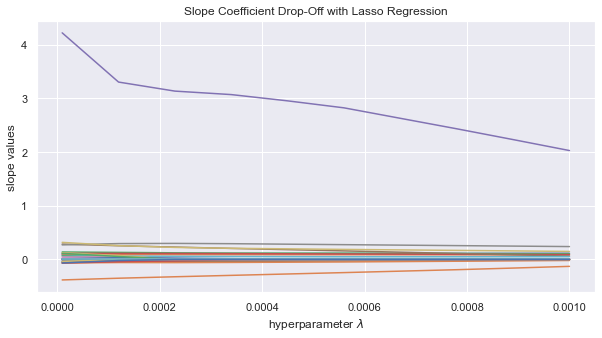

Lasso picked 14 features and eliminated the other 17 features


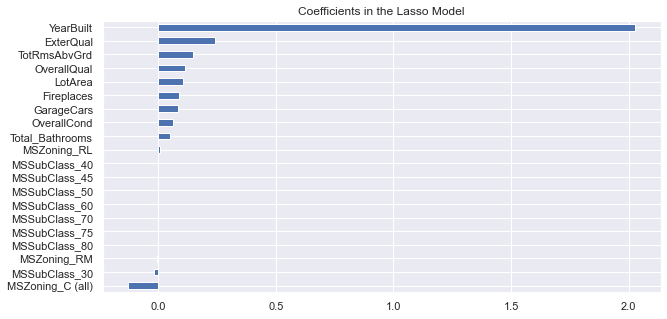

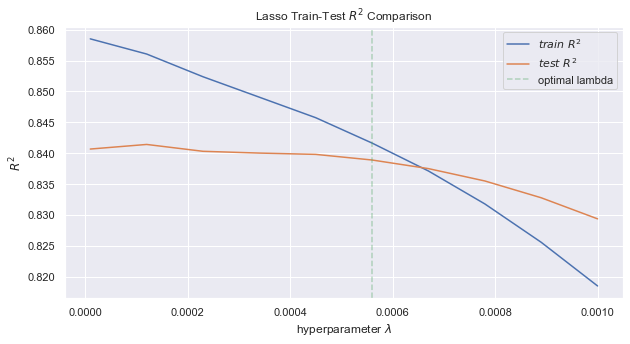

In [98]:
train_r2_lasso = []
test_r2_lasso  = []
coefs_lasso = []
alphaRange = np.linspace(0.00001, 0.001, 10)

for alpha in alphaRange:
    lasso.set_params(alpha=alpha, normalize=True)  
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)
    train_r2_lasso.append(lasso.score(X_train, y_train))
    test_r2_lasso.append(lasso.score(X_test, y_test))
coefs_lasso = pd.DataFrame(coefs_lasso, index = alphaRange, columns = X_train.columns)

# Plot change in coefficients with different values of alpha
plt.rcParams['figure.figsize'] = (10,5)

for name in coefs_lasso.columns:
    plt.plot(coefs_lasso.index, coefs_lasso[name], label=name)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')
plt.title(r'Slope Coefficient Drop-Off with Lasso Regression')
plt.show()

# Plot important coefficients

coefs = pd.Series(lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " + 
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()



# Plot R2 for different alphas
lasso_scores_train = np.array(train_r2_lasso) 
lasso_scores_test  = np.array(test_r2_lasso)

plt.plot(alphaRange, lasso_scores_train, label=r'$train\ R^2$')
plt.plot(alphaRange, lasso_scores_test, label=r'$test\ R^2$')
plt.title(r'Lasso Train-Test $R^2$ Comparison')
# lasso_underfit = lasso_scores_train < lasso_scores_test
# last_underfit  = np.max(alphaRange[lasso_underfit])
lasso_overfit = alphaRange[lasso_scores_test < lasso_scores_train]
last_overfit = max(lasso_overfit)
#last_underfit  = np.max(alphaRange[lasso_underfit])

#highest_test_alpha = alphaRange[lasso_scores_test == max(lasso_scores_test)]


plt.axvline(last_overfit, linestyle='--', color='g', label='optimal lambda', alpha=0.4)
plt.legend(loc=1)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')
plt.show()

# for name in coefs_lasso.iloc[0, :].sort_values().index:
#     plt.plot(coefs.index, coefs_lasso[name], label=name)
# # plt.legend(loc=4)   
# plt.title(r'Slope Coefficient Drop-Off with Lasso Regression')
# plt.xlabel(r'hyperparameter $\lambda$')
# plt.ylabel(r'slope values')

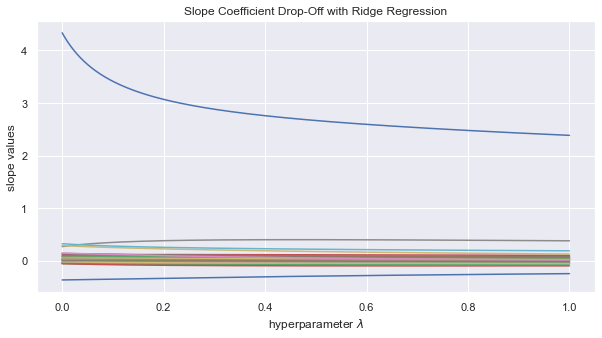

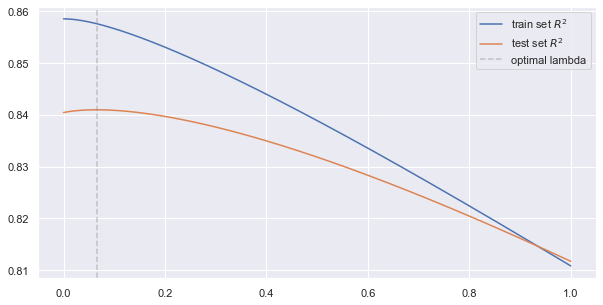

The Ridge (best alpha) train score is: 0.86
The Ridge (best alpha) test score is: 0.84 
Ridge picked 31 features and eliminated the other 0 features


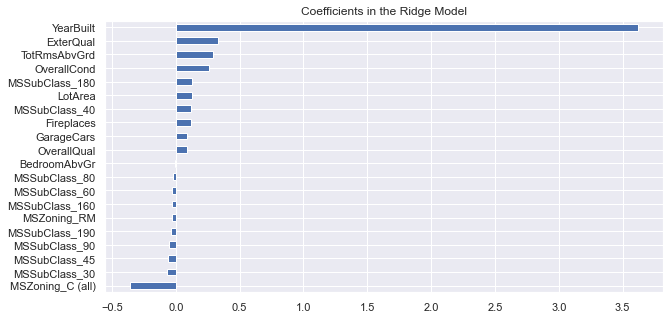

In [99]:
# Ridge
train_r2 = []
test_r2  = []
coefs = []
alphaRange = np.linspace(.00001, 1, 1000)

for alpha in alphaRange:
    ridge.set_params(alpha=alpha, normalize=True)  
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    train_r2.append(ridge.score(X_train, y_train))
    test_r2.append(ridge.score(X_test, y_test))
coefs = pd.DataFrame(coefs, index = alphaRange, columns = X_train.columns)

# Plot change in coefficients with different values of alpha
plt.rcParams['figure.figsize'] = (10,5)
for name in coefs.iloc[0, :].sort_values().index:
    plt.plot(coefs.index, coefs[name], label=name)
# plt.legend(loc=4)   
plt.title(r'Slope Coefficient Drop-Off with Ridge Regression')
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')
plt.show()

# Plot R2
plt.plot(alphaRange, train_r2, label=r'train set $R^2$')
plt.plot(alphaRange, test_r2, label=r'test set $R^2$')
highest_test_alpha = alphaRange[np.array(test_r2) == max(test_r2)]
plt.axvline(highest_test_alpha, linestyle='--', color='grey', label='optimal lambda', alpha=0.4)
plt.legend(loc=1)
plt.show()

ridge.set_params(normalize=True, alpha=highest_test_alpha)
ridge.fit(X_train, y_train)
print("The Ridge (best alpha) train score is: {:.2f}".format(ridge.score(X_train, y_train)))
print("The Ridge (best alpha) test score is: {:.2f} ".format(ridge.score(X_test, y_test)))

# Plot important coefficients
coefs = pd.Series(ridge.coef_, index = X_train.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " + 
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()


In [100]:
# Define a Random Forest Regressor model
rf_model_topFeats = RandomForestRegressor(random_state =1)
rf_model_topFeats.fit(X_train, y_train)
rf_model_topFeats_predictions = rf_model_topFeats.predict(X_test)

# Check the error
train_error = (1 - rf_model_topFeats.score(X_train, y_train))
test_error = (1 - rf_model_topFeats.score(X_test, y_test))
    # check MAE
rf_model_topFeats_test_mae = mean_absolute_error(rf_model_topFeats_predictions, y_test)

print("Training Accuracy: {:,.05f}".format(rf_model_topFeats.score(X_train, y_train)))
print("Training Error: {:,.05f}".format(train_error))
print("Test Accuracy: {:,.05f}".format(rf_model_topFeats.score(X_test, y_test)))
print("Test Error is: {:,.05f}".format(test_error))
print("Validation MAE for Random Forest Model: {:,.0f}".format(rf_model_topFeats_test_mae))

Training Accuracy: 0.97472
Training Error: 0.02528
Test Accuracy: 0.85774
Test Error is: 0.14226
Validation MAE for Random Forest Model: 0


#### Submission - Testing Best Model on Test Dataset

In [137]:
test = pd.read_csv("./house-prices-data/test2.csv")

test.drop("Id", axis= 1, inplace=True)
# test['SalePrice'] = np.log1p(test['SalePrice'])
print(test.head(10))
test.shape

   MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities  \
0          20       RH       80.000    11622   Pave   NaN      Reg         Lvl    AllPub   
1          20       RL       81.000    14267   Pave   NaN      IR1         Lvl    AllPub   
2          60       RL       74.000    13830   Pave   NaN      IR1         Lvl    AllPub   
3          60       RL       78.000     9978   Pave   NaN      IR1         Lvl    AllPub   
4         120       RL       43.000     5005   Pave   NaN      IR1         HLS    AllPub   
5          60       RL       75.000    10000   Pave   NaN      IR1         Lvl    AllPub   
6          20       RL          nan     7980   Pave   NaN      IR1         Lvl    AllPub   
7          60       RL       63.000     8402   Pave   NaN      IR1         Lvl    AllPub   
8          20       RL       85.000    10176   Pave   NaN      Reg         Lvl    AllPub   
9          20       RL       70.000     8400   Pave   NaN      Reg         Lvl  

(1459, 79)

In [138]:
# Apply the same pre-processing steps applied to Train Set to the Test Set

test["MSSubClass"] = test["MSSubClass"].astype("str")

# test = test.replace({"MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
#                             7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}})

# Alley : convert to ordinal variable
# already removed --> train_df["Alley"] = train_df["Alley"].map(lambda x: 1 if x == "Grv1" else 2 if x == "Pave" else 0)


# BASEMENT VARIABLES
    #convert string vars to ordered values
    # NAs = these are places without basements
test["BsmtQual"] = test["BsmtQual"].map(lambda x: 0 if x == False else 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x == "Gd" else 5)
test["BsmtCond"] = test["BsmtCond"].map(lambda x: 0 if x == False else 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x == "Gd" else 5)
test["BsmtExposure"] = test["BsmtExposure"].map(lambda x: 0 if x == False else 1 if x == "No" else 2 if x == "Mn" else 3 if x == "Av" else 4)
test["BsmtFinType1"] = test["BsmtFinType1"].map(lambda x: 0 if x == False else 1 if x == "Unf" else 2 if x == "LwQ" else 3 if x == "Rec" else 4 if x == "BLQ" else 5 if x == "ALQ" else 6)
test["BsmtFinType2"] = test["BsmtFinType2"].map(lambda x: 0 if x == False else 1 if x == "Unf" else 2 if x == "LwQ" else 3 if x == "Rec" else 4 if x == "BLQ" else 5 if x == "ALQ" else 6)

    # handle missing numerical data e.g. square footage - replace with 0s
test["BsmtUnfSF"] = test["BsmtUnfSF"].map(lambda x: 0 if "NaN" else x)
test["TotalBsmtSF"] = test["TotalBsmtSF"].map(lambda x: 0 if "NaN" else x)
test["BsmtFullBath"] = test["BsmtFullBath"].map(lambda x: 0 if "NaN" else x)
test["BsmtHalfBath"] = test["BsmtHalfBath"].map(lambda x: 0 if "NaN" else x)

# EXTERNAL FEATURE VARIABLES: convert to ordered numbers
test["ExterCond"] = test["ExterCond"].map(lambda x: 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x== "Gd" else 5 if x == "Ex" else 0)
test["ExterQual"] = test["ExterQual"].map(lambda x: 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x== "Gd" else 5 if x == "Ex" else 0)

# GARAGE VARIABLES
    # convert quality and condition variables to ordered numbers
test["GarageQual"] = test["GarageQual"].map(lambda x: 0 if x == False else 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x == "Gd" else 5)
test["GarageCond"] = test["GarageCond"].map(lambda x: 0 if x == False else 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x == "Gd" else 5)

    # handle missing values in Garage Finish and Garage Type and GarageYr (likely indicate houses did not have garages)
test["GarageFinish"] = test["GarageFinish"].map(lambda x: 0 if x == False else 1 if x == "Unf" else 2 if x == "RFn" else 3)
test["GarageType"] = test["GarageType"].fillna("None")
test["GarageYrBlt"] = test["GarageYrBlt"].fillna(0)

# OTHER QUALITY VARIABLES
    # convert quality and condition to ordered numbers
test["HeatingQC"] = test["HeatingQC"].map(lambda x: 0 if x == False else 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x == "Gd" else 5)
test["KitchenQual"] = test["KitchenQual"].map(lambda x: 0 if x == False else 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x == "Gd" else 5)
    # NAs are likely homes without fireplaces
test["FireplaceQu"] = test["FireplaceQu"].map(lambda x: 0 if x == False else 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x == "Gd" else 5)
test["Functional"] = test["Functional"].map(lambda x: 0 if x == False else 1 if x == "Sal" else 2 if x == "Sev" else 3 if x == "Maj2" else 4 if x == "Maj1" else 5 if x == "Mod" 
                                                   else 6 if x == "Min2" else 7 if x == "Min1" else 8 if x == "Typ" else 9)

test  = test.replace({
    "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
    "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
    "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
    "Street" : {"Grvl" : 1, "Pave" : 2},
    "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}})


In [139]:
#Feature engineering

    # consolidate number of bathrooms
test['Total_Bathrooms'] = (test['FullBath'] 
                               + (0.5 * test['HalfBath']) 
                               + test['BsmtFullBath'] 
                               + (0.5 * test['BsmtHalfBath'])
                              )


    # Calculate a total square footage for the home - buyers typically look at this when evaluating homes
test['TotalSqFeet'] = test["GrLivArea"] + test["TotalBsmtSF"]

    # Consolidate porch variables
test['TotalPorchArea'] = (test["WoodDeckSF"] + test["OpenPorchSF"] + test["EnclosedPorch"] 
                                + test["3SsnPorch"] + test["ScreenPorch"])


seasons = {1: 'Winter', 2:'Winter', 3: 'Spring', 4: 'Spring', 
           5:'Spring', 6: 'Summer', 7: 'Summer', 8:'Summer', 
           9: 'Fall', 10: 'Fall', 11:'Fall', 12: 'Winter'}

test['SeasonSold'] = test["MoSold"].apply(lambda x: seasons[x])

test['Age'] = test.apply(lambda x: x['YrSold'] - x['YearBuilt'] if (x['YearBuilt']<x['YearRemodAdd']) 
                                                           else (x['YrSold']-x['YearRemodAdd']), axis=1)

In [140]:
# Impute Lot Frontage based on median Lot Frontage in the house's neighborhood
test["LotFrontage"] = test.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [141]:
# test = test.drop(columns = ["WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch","ScreenPorch",#consolidated
#                                     "GrLivArea", "TotalBsmtSF",'1stFlrSF', '2ndFlrSF',  # captured in TotalSqSFeet
#                                     'FullBath','HalfBath', 'BsmtFullBath','BsmtHalfBath', # captured in Total_Bathrooms
#                                     'GarageYrBlt', 'YearRemodAdd', 'YearBuilt', 'YrSold',  # captured in Age
#                                     "MoSold", # captured in Season
#                                     "ExterQual", # high correlation with Overall Quality
#                                     "MiscVal", "PoolArea", # low variance 
#                             "Alley", "Fence", "PoolQC", "MiscFeature", # Missing more than 80% of values
#                                     "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF"]) # captured in TotalBsmntSF

# based on top features from the various models
selected_cols = ["OverallQual", "GarageCars", "Age", "MSSubClass", "MSZoning","Fireplaces","LotArea","GarageArea",
                 "TotalSqFeet", "OverallCond", "TotalPorchArea", "KitchenQual","TotRmsAbvGrd" ,"CentralAir" ,
                "Functional", "Street", "MasVnrArea", "Neighborhood"]

test = test[selected_cols]

In [142]:
# Preprocessing - separate categorical from numerical features

categorical_features = test.select_dtypes(include = ["object"]).columns
numerical_features = test.select_dtypes(exclude = ["object"]).columns
# numerical_features = numerical_features.drop("SalePrice")

print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))

test_num = test[numerical_features]
test_cat = test[categorical_features]

#Confirm that there are no missing values
print("NAs for categorical features in train : " + str(test.isnull().values.sum()))
print("NAs for numerical features in train : " + str(test.isnull().values.sum()))


Numerical features : 33
Categorical features : 23
NAs for categorical features in train : 0
NAs for numerical features in train : 0


In [143]:
# Log transform skewed numerical features to reduce impact of outliers
skewness = test_num.apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]
print(str(skewness.shape[0]) + " skewed numerical features to log transform")
skewed_features = skewness.index # pulls index for columns that are skewed
test_num[skewed_features] = np.log1p(test_num[skewed_features]) # transforms skewed features

23 skewed numerical features to log transform


<ipython-input-143-1633727e2cef>:6: RuntimeWarning: divide by zero encountered in log1p
  test_num[skewed_features] = np.log1p(test_num[skewed_features]) # transforms skewed features
/Users/jeremyosir/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [144]:
test_cat = pd.get_dummies(test_cat)

In [145]:
test_data = pd.concat([test_cat, test_num], axis = 1)
print("New number of features : " + str(test_data.shape[1]))

New number of features : 204


In [146]:
# Select columns to subset based on Random Forest Feature Selection
# selected_cols = ["OverallQual", "GarageCars", "LotArea", "MSSubClass", "MSZoning","Fireplaces",
#                  "YearBuilt", "OverallCond", "TotalPorchArea", "ExterQual", "TotRmsAbvGrd",
#                 "Total_Bathrooms", "BedroomAbvGr" ]

# test_data = test_data[selected_cols]

In [147]:
test_data.head(5)
test_data.columns

Index(['MSSubClass_120', 'MSSubClass_150', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190',
       'MSSubClass_20', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50',
       ...
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'Total_Bathrooms', 'TotalSqFeet', 'TotalPorchArea', 'Age'],
      dtype='object', length=204)

In [148]:
# test_data = pd.get_dummies(test_data, columns= ["MSZoning", "MSSubClass"])
# print("New number of features : " + str(test_data.shape[1]))

In [151]:
# Get missing columns in the training test
missing_cols = set( X_train.columns ) - set( test_data.columns )
# # Add a missing column in test set with default value equal to 0
for c in missing_cols:
    test_data[c] = 0
# # Ensure the order of column in the test set is in the same order than in train set
test_data = test_data[X_train.columns]

In [156]:
test_data = np.nan_to_num(test_data.astype(np.float32))

In [158]:
predicted_prices_rf = rf_model_topFeats.predict(test_data)

# Undo log transform
predicted_prices_rf = np.expm1(predicted_prices_rf)

test_copy = pd.read_csv("./house-prices-data/test2.csv")

my_submission = pd.DataFrame({'Id': test_copy.Id, 'SalePrice': predicted_prices_rf})
# you could use any filename. We choose submission here
my_submission.to_csv('submission_JeremyOsir_rf.csv', index=False)

print(predicted_prices_rf)

[127020.95347395 156032.07140925 181686.86554362 ... 157676.29449706
 121759.6323017  228995.34148806]
